In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
iris = load_iris()

In [6]:
data = iris.data
data = StandardScaler().fit_transform(data)

In [7]:
targets = iris.target

In [9]:
mean_vectors = []
for flower_class in range(0,3):
    mean_vectors.append(np.mean(data[targets==flower_class], axis=0))
    print('Mean Vector class %s: %s\n' %(flower_class, mean_vectors[flower_class]))

Mean Vector class 0: [-1.01457897  0.84230679 -1.30487835 -1.25512862]

Mean Vector class 1: [ 0.11228223 -0.65718442  0.28508673  0.16740892]

Mean Vector class 2: [ 0.90229674 -0.18512237  1.01979162  1.08771971]



In [10]:
within_class_matrix = np.zeros((4,4))
for flower_class, mean_vector in zip(range(0,3), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in data[targets == flower_class]:
        row, mv = row.reshape(4,1), mean_vector.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    within_class_matrix += class_sc_mat                             # sum class scatter matrices
print 'within-class Scatter Matrix:\n', within_class_matrix

within-class Scatter Matrix:
[[ 57.19414039  38.36522254  16.9597752    9.00954035]
 [ 38.36522254  91.21788053  10.68502072  14.94754387]
 [ 16.9597752   10.68502072   8.80215397   4.67538084]
 [  9.00954035  14.94754387   4.67538084  10.6746122 ]]


In [11]:
overall_mean = np.mean(data, axis=0)

without_class_matrix = np.zeros((4,4))
for i ,mean_vec in enumerate(mean_vectors): 
    n = data[targets==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    without_class_matrix += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print 'between-class Scatter Matrix:\n', without_class_matrix

between-class Scatter Matrix:
[[ 52.09888909 -46.41884437  67.79561537  64.61120734]
 [-46.41884437  57.06860484 -64.32312295 -58.36109471]
 [ 67.79561537 -64.32312295  89.19909813  84.27581143]
 [ 64.61120734 -58.36109471  84.27581143  80.16867994]]


In [12]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(within_class_matrix).dot(without_class_matrix))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print '\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real)
    print 'Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real)


Eigenvector 1: 
[[-0.14919128]
 [-0.15716876]
 [ 0.86348805]
 [ 0.45544301]]
Eigenvalue 1: 2.09e+01

Eigenvector 2: 
[[-0.00191277]
 [ 0.31933192]
 [-0.51546546]
 [ 0.79518477]]
Eigenvalue 2: 1.43e-01

Eigenvector 3: 
[[-0.31841316]
 [-0.09452594]
 [-0.52987268]
 [ 0.74482792]]
Eigenvalue 3: 7.75e-16

Eigenvector 4: 
[[-0.31841316]
 [-0.09452594]
 [-0.52987268]
 [ 0.74482792]]
Eigenvalue 4: 7.75e-16


In [13]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

20.9046229264
0.142833256676
8.5463739579e-16
8.5463739579e-16


In [14]:
print ('Discrimination explained:\m\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print 'eigenvalue {0:}: {1:}'.format(i+1, (j[0]/eigv_sum.real)*100)

Discrimination explained:\m

eigenvalue 1: 99.3213752036
eigenvalue 2: 0.678624796429
eigenvalue 3: 4.06052583437e-15
eigenvalue 4: 4.06052583437e-15


In [15]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print 'Matrix W:\n', W.real

Matrix W:
[[-0.14919128 -0.00191277]
 [-0.15716876  0.31933192]
 [ 0.86348805 -0.51546546]
 [ 0.45544301  0.79518477]]


In [16]:
data_lda = data.dot(W)

data_lda[0:5]

array([[-1.78399213+0.j, -0.02138789+0.j],
       [-1.56599117+0.j, -0.39039612+0.j],
       [-1.65167828+0.j, -0.21283157+0.j],
       [-1.49902607+0.j, -0.34511877+0.j],
       [-1.80228426+0.j,  0.05273823+0.j]])

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

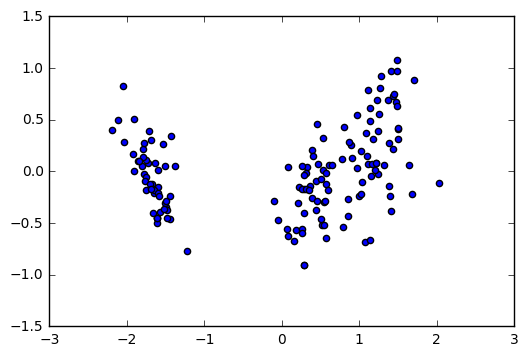

In [19]:
plt.scatter(data_lda[:, 0].real, data_lda[:, 1].real)

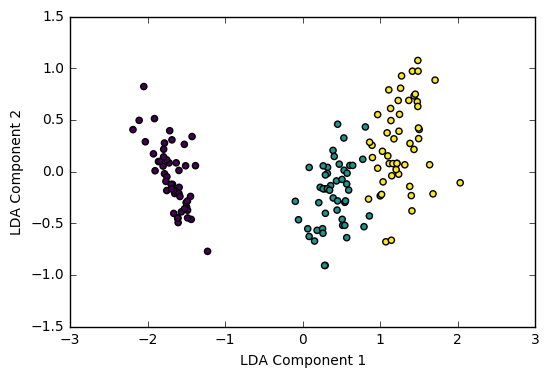

In [20]:
plt.scatter(data_lda[:, 0].real, data_lda[:, 1].real,
            c=targets, cmap='viridis'
           )
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')

In [21]:
from sklearn.decomposition import PCA

In [24]:
pca_components=PCA(n_components=2).fit_transform(data)

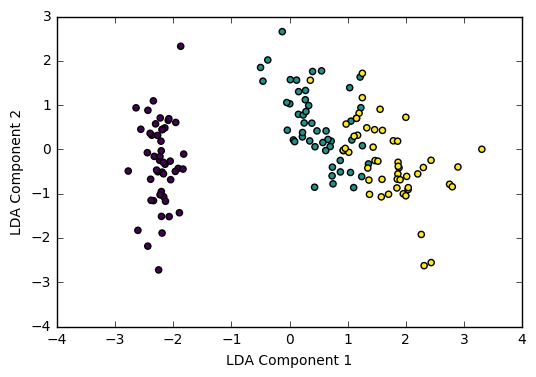

In [30]:
plt.scatter(pca_components[:, 0].real, pca_components[:, 1].real,
            c=targets, cmap='viridis'
           )
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [28]:
lda_with_sklearn = LinearDiscriminantAnalysis(n_components=2).fit_transform(data, y)

In [29]:
lda_with_sklearn[0:5]

array([[-8.0849532 ,  0.32845422],
       [-7.1471629 , -0.75547326],
       [-7.51137789, -0.23807832],
       [-6.83767561, -0.64288476],
       [-8.15781367,  0.54063935]])

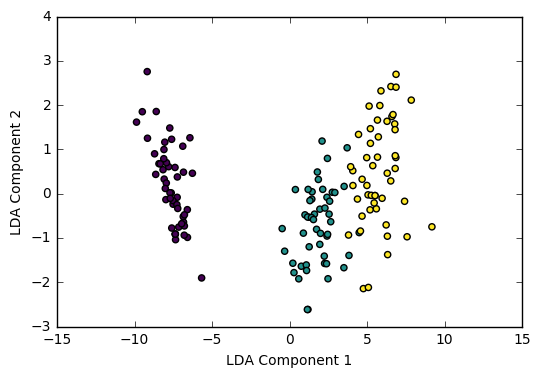

In [32]:
plt.scatter(lda_with_sklearn[:, 0].real, lda_with_sklearn[:, 1].real,
            c=targets, cmap='viridis'
           )
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')